<a href="https://colab.research.google.com/github/denis3079/Fuzzy_Logic/blob/main/%22Scoring_credit_card_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=8c89c52196242a76412bafa86ea7e73ebb5c5caf40688db39f012420f82d7c9a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


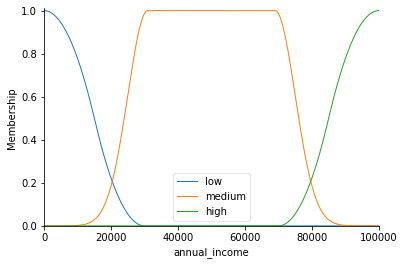

In [ ]:
import skfuzzy as skf
from skfuzzy import control as ctrl

annual_income = ctrl.Antecedent(np.arange(0, 100001, 100.), "annual_income")

annual_income['low'] = skf.zmf(annual_income.universe, 0, 30000)
annual_income['medium'] = skf.gauss2mf(annual_income.universe, 31000, 6000, 69000, 6000)
annual_income['high'] = skf.smf(annual_income.universe, 70000, 100000)

annual_income.view()

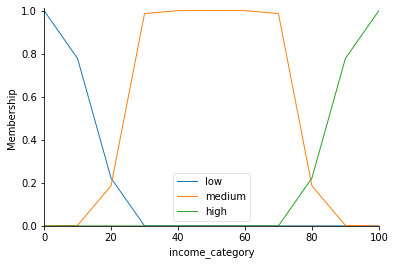

In [ ]:
income_category = ctrl.Antecedent(np.arange(0, 101, 10.), "income_category")

income_category['low'] = skf.zmf(income_category.universe, 0, 30)
income_category['medium'] = skf.gauss2mf(income_category.universe, 31, 6, 69, 6)
income_category['high'] = skf.smf(income_category.universe, 70, 100)

income_category.view()

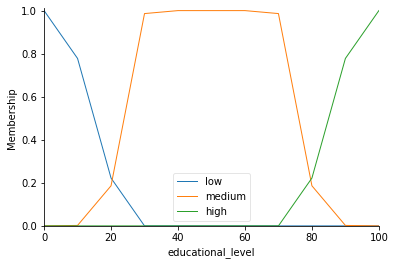

In [ ]:
educational_level = ctrl.Antecedent(np.arange(0, 101, 10.), "educational_level")

educational_level['low'] = skf.zmf(educational_level.universe, 0, 30)
educational_level['medium'] = skf.gauss2mf(educational_level.universe, 31, 6, 69, 6)
educational_level['high'] = skf.smf(educational_level.universe, 70, 100)

educational_level.view()

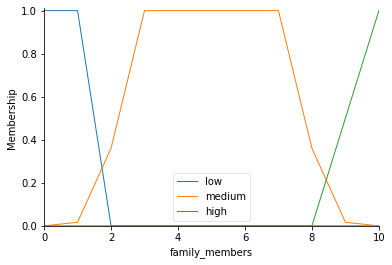

In [ ]:
family_members = ctrl.Antecedent(np.arange(0, 11, 1.), "family_members")

family_members['low'] = skf.zmf(family_members.universe, 1, 2)
family_members['medium'] = skf.gauss2mf(family_members.universe, 3, 0.7, 7, 0.7)
family_members['high'] = skf.smf(family_members.universe, 8, 10)

family_members.view()

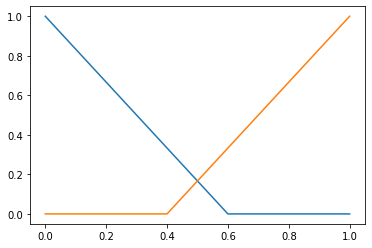

In [ ]:
credit_card_approval = np.arange(0, 1.1, 0.1)

def trapezoid(array, a, b, c, d):
    result = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            result[i] = 0
        elif b <= x <= c:
            result[i] = 1.
        elif a < x < b:
            result[i] = (x - a)/div1
        elif c < x < d:
            result[i] = (x - d)/div2
    return result

yes = trapezoid(credit_card_approval, -1, 0, 0, 0.6)
no = trapezoid(credit_card_approval, 0.4, 1, 1, 2)


plt.plot(credit_card_approval,yes)
plt.plot(credit_card_approval, no)

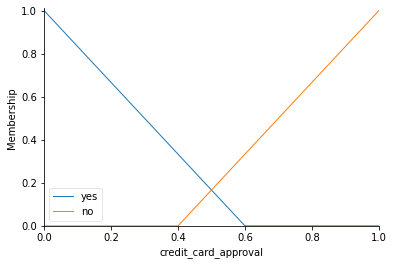

In [ ]:
credit_card_approval = ctrl.Consequent(np.arange(0, 1.1, 0.1), "credit_card_approval")

credit_card_approval['yes'] = trapezoid(credit_card_approval.universe, -1, 0, 0, 0.6)
credit_card_approval['no'] = trapezoid(credit_card_approval.universe, 0.4, 1, 1, 2)

credit_card_approval.view()

In [ ]:
rule_1 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['low'] & family_members['low'], [credit_card_approval['no']])
rule_2 = ctrl.Rule(annual_income['low'] & income_category['medium'] & educational_level['low'] & family_members['low'], [credit_card_approval['no']])
rule_3 = ctrl.Rule(annual_income['low'] & income_category['medium'] & educational_level['medium'] & family_members['low'], [credit_card_approval['no']])
rule_4 = ctrl.Rule(annual_income['low'] & income_category['medium'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['no']])
rule_5 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['medium'] & family_members['low'], [credit_card_approval['no']])
rule_6 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['no']])
rule_7 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['medium'] & family_members['high'], [credit_card_approval['no']])
rule_8 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['low'], [credit_card_approval['no']])
rule_9 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['medium'], [credit_card_approval['no']])
rule_10 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['high'], [credit_card_approval['no']])
rule_11 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['low'] & family_members['low'], [credit_card_approval['no']])
rule_12 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['low'] & family_members['medium'], [credit_card_approval['no']])
rule_13 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['low'] & family_members['high'], [credit_card_approval['no']])
rule_14 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['low'] & family_members['low'], [credit_card_approval['no']])
rule_15 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['low'] & family_members['medium'], [credit_card_approval['no']])
rule_16 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['low'] & family_members['high'], [credit_card_approval['no']])
rule_17 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['yes']])
rule_18 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['yes']])
rule_19 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['high'] & family_members['medium'], [credit_card_approval['yes']])
rule_20 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['high'] & family_members['low'], [credit_card_approval['yes']])
rule_21 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['high'] & family_members['high'], [credit_card_approval['yes']])
rule_22 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['medium'] & family_members['low'], [credit_card_approval['yes']])
rule_23 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['high'] & family_members['low'], [credit_card_approval['yes']])
rule_24 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['high'] & family_members['medium'], [credit_card_approval['yes']])
rule_25 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['high'] & family_members['high'], [credit_card_approval['yes']])
rule_26 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['medium'] & family_members['low'], [credit_card_approval['yes']])
rule_27 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['yes']])
rule_28 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['medium'] & family_members['high'], [credit_card_approval['yes']])
rule_29 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['high'] & family_members['low'], [credit_card_approval['yes']])
rule_30 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['high'] & family_members['medium'], [credit_card_approval['yes']])
rule_31 = ctrl.Rule(annual_income['high'] & income_category['high'] & educational_level['high'] & family_members['high'], [credit_card_approval['yes']])
rule_32 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['medium'] & family_members['low'], [credit_card_approval['yes']])
rule_33 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['yes']])
rule_34 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['medium'] & family_members['high'], [credit_card_approval['yes']])
rule_35 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['low'] & family_members['low'], [credit_card_approval['yes']])
rule_36 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['low'] & family_members['medium'], [credit_card_approval['yes']])
rule_37 = ctrl.Rule(annual_income['high'] & income_category['medium'] & educational_level['low'] & family_members['high'], [credit_card_approval['yes']])
rule_38 = ctrl.Rule(annual_income['high'] & income_category['low'] & educational_level['low'] & family_members['high'], [credit_card_approval['yes']])
rule_39 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['low'] & family_members['low'], [credit_card_approval['yes']])
rule_40 = ctrl.Rule(annual_income['medium'] & income_category['high'] & educational_level['medium'] & family_members['low'], [credit_card_approval['yes']])
rule_41 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['high'] & family_members['low'], [credit_card_approval['yes']])
rule_42 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['high'] & family_members['medium'], [credit_card_approval['yes']])
rule_43 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['high'] & family_members['low'], [credit_card_approval['yes']])
rule_44 = ctrl.Rule(annual_income['medium'] & income_category['low'] & educational_level['high'] & family_members['high'], [credit_card_approval['yes']])
rule_45 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['high'] & family_members['medium'], [credit_card_approval['yes']])
rule_46 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['high'] & family_members['high'], [credit_card_approval['yes']])
rule_47 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['medium'] & family_members['low'], [credit_card_approval['yes']])
rule_48 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['yes']])
rule_49 = ctrl.Rule(annual_income['medium'] & income_category['medium'] & educational_level['medium'] & family_members['high'], [credit_card_approval['no']])
rule_50 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['low'] & family_members['medium'], [credit_card_approval['no']])
rule_51 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['low'] & family_members['high'], [credit_card_approval['no']])
rule_52 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['medium'] & family_members['low'], [credit_card_approval['no']])
rule_53 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['medium'] & family_members['medium'], [credit_card_approval['no']])
rule_54 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['medium'] & family_members['high'], [credit_card_approval['no']])
rule_55 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['high'] & family_members['low'], [credit_card_approval['no']])
rule_56 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['high'] & family_members['medium'], [credit_card_approval['no']])
rule_57 = ctrl.Rule(annual_income['low'] & income_category['low'] & educational_level['high'] & family_members['high'], [credit_card_approval['no']])
rule_58 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['low'], [credit_card_approval['no']])
rule_59 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['medium'], [credit_card_approval['no']])
rule_60 = ctrl.Rule(annual_income['low'] & income_category['high'] & educational_level['high'] & family_members['high'], [credit_card_approval['no']])

In [ ]:
rules_base = [rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10,
              rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19,
              rule_20, rule_21, rule_22, rule_23, rule_24, rule_25, rule_26, rule_27, rule_28,
              rule_29, rule_30, rule_31, rule_32, rule_33, rule_34, rule_35, rule_36, rule_37, 
              rule_38, rule_39, rule_40, rule_41, rule_42, rule_43, rule_44, rule_45, rule_46, 
              rule_47, rule_48, rule_49, rule_50, rule_51, rule_52, rule_53, rule_54, rule_55,
              rule_56, rule_57, rule_58, rule_59, rule_60]

mark_ctrl = ctrl.ControlSystem(rules_base)

In [ ]:
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.7736128523290948


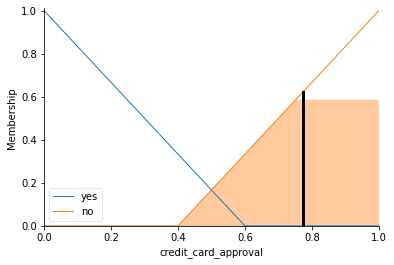

In [ ]:
marking.input['annual_income'] = 10000
marking.input['income_category'] = 75
marking.input['educational_level'] = 25
marking.input['family_members'] = 1
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.22421884792618957


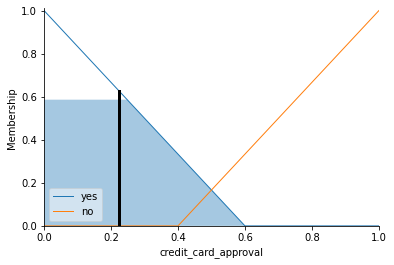

In [ ]:
marking.input['annual_income'] = 30000
marking.input['income_category'] = 75
marking.input['educational_level'] = 75
marking.input['family_members'] = 1
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.7751406437992323


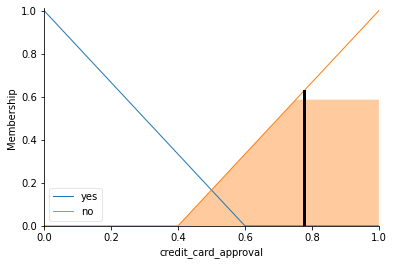

In [ ]:
marking.input['annual_income'] = 8000
marking.input['income_category'] = 75
marking.input['educational_level'] = 25
marking.input['family_members'] = 4
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.708935158630797


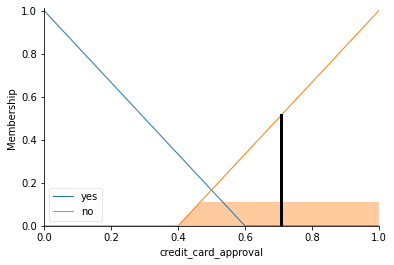

In [ ]:
marking.input['annual_income'] = 10000
marking.input['income_category'] = 25
marking.input['educational_level'] = 25
marking.input['family_members'] = 9
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.7783503786962109


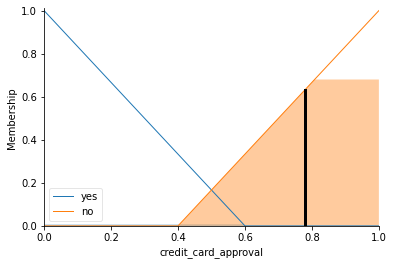

In [ ]:
marking.input['annual_income'] = 12000
marking.input['income_category'] = 50
marking.input['educational_level'] = 50
marking.input['family_members'] = 1
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.7160526200863556


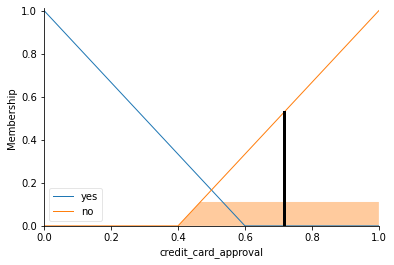

In [ ]:
marking.input['annual_income'] = 5000
marking.input['income_category'] = 25
marking.input['educational_level'] = 25
marking.input['family_members'] = 9
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.24989496867069685


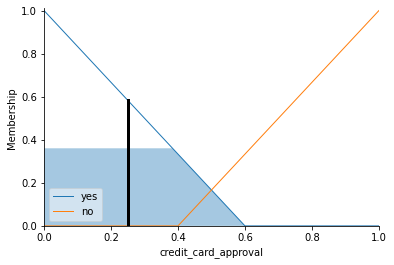

In [ ]:
marking.input['annual_income'] = 70000
marking.input['income_category'] = 75
marking.input['educational_level'] = 75
marking.input['family_members'] = 8
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.24989496867069685


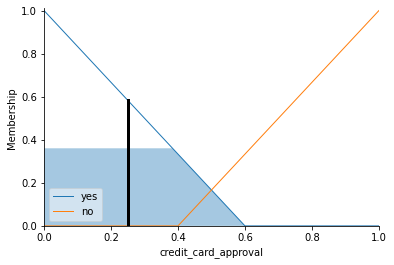

In [ ]:
marking.input['annual_income'] = 30000
marking.input['income_category'] = 100
marking.input['educational_level'] = 100
marking.input['family_members'] = 2
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.24989496867069685


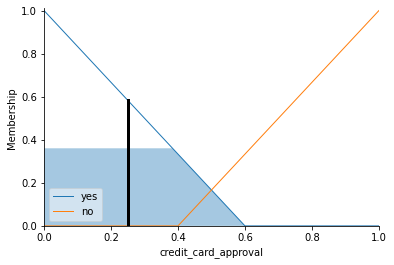

In [ ]:
marking.input['annual_income'] = 35000
marking.input['income_category'] = 50
marking.input['educational_level'] = 50
marking.input['family_members'] = 2
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)

0.22421884792618957


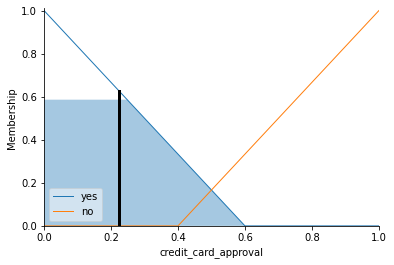

In [ ]:
marking.input['annual_income'] = 40000
marking.input['income_category'] = 100
marking.input['educational_level'] = 75
marking.input['family_members'] = 1
marking.compute()

print(marking.output['credit_card_approval'])
credit_card_approval.view(sim=marking)